# Notebook to bitcoin analysis
### Created by Cleiton Souza (cleitonsouza01@gmail.com) 
This study was developed original in portuguese, some parts was not possible yet to translate to english


In [1]:
# Importing libraries required
from nn_prereq import *

%matplotlib inline

To check quandl symbols 
https://www.quandl.com/search?query=

In [2]:
# Importing useful functions to this analysys, keep out this notebook just to keep code clear
from nn_funcoes import *          
            

In [3]:
########################################
#
# LOAD DATA FROM WEB OR CACHE FILE
#
# tickInterval must be in [“oneMin”, “fiveMin”, “thirtyMin”, “hour”, “day”].
#
# 'BCHARTS/MRCDBRL'   'BCHARTS/FOXBITBRL'
today_date = datetime.datetime.now().strftime('%Y-%m-%d')

exchange='BCHARTS/MRCDBRL'
janela = 'day'
BTCUSD_COMPARE = True


#df = get_data_local('USDT-BTC', janela)
df = get_data(exchange, 'quandl', janela)
if BTCUSD_COMPARE: df_BTC = get_data('BCHARTS/BITSTAMPUSD', 'quandl', janela)

print('\nSize df: {}'.format( len(df.index) ))

if BTCUSD_COMPARE:  print('Size df_BTC: {}'.format( len(df_BTC.index) ))



Loaded BCHARTS/MRCDBRL from cache DATA/QUANDL-BCHARTS-MRCDBRL-2010-01-01_2022-02-24.pkl
Loaded BCHARTS/BITSTAMPUSD from cache DATA/QUANDL-BCHARTS-BITSTAMPUSD-2010-01-01_2022-02-24.pkl

Size df: 2756
Size df_BTC: 3560


In [4]:
pd.options.display.max_rows = 100
df.loc[pd.date_range(start='2011-09-01', end='2011-12-01')]

,Open,High,Low,Close,VolumeBTC,VolumeCurrency,WeightedPrice
2011-09-01,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2011-09-02,17.99000,18.00000,17.99000,18.00000,9.999500,179.971000,17.998000
2011-09-03,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2011-09-04,10.00000,18.49000,10.00000,14.00000,5.631330,85.568920,15.195153
2011-09-05,12.00000,12.00000,12.00000,12.00000,0.780000,9.360000,12.000000
2011-09-06,12.50000,14.00000,12.50000,14.00000,0.220000,3.000000,13.636364
2011-09-07,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2011-09-08,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2011-09-09,12.00000,14.00000,9.00000,9.00000,27.420000,267.811000,9.766995
2011-09-10,13.00000,13.00000,13.00000,13.00000,0.050000,0.650000,13.000000


In [5]:

df = df.loc[pd.date_range(start='2014-01-01', end=today_date)]


/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [6]:
df.head()

,Open,High,Low,Close,VolumeBTC,VolumeCurrency,WeightedPrice
2014-01-01,1848.00000,1890.00000,1841.00,1841.10001,20.161476,37598.984710,1864.892432
2014-01-02,1870.00000,1950.00000,1841.02,1950.00000,48.004747,91095.302187,1897.631111
2014-01-03,1945.00000,2107.99999,1889.00,2103.98999,51.870842,106500.374293,2053.183826
2014-01-04,2103.98999,2198.99998,1990.00,2145.00000,41.233653,86605.831022,2100.367671
2014-01-05,2145.00000,2300.00000,2100.00,2225.00068,27.681660,61500.276185,2221.697542


In [7]:
########################################
#
# CONVERTION DATA REQUIRED TO QUANDL
#
#


df.rename(columns={'VolumeBTC': 'Volume', 'VolumeCurrency': 'Base_Volume'}, inplace=True)
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Base_Volume,WeightedPrice
2014-01-01,1848.00000,1890.00000,1841.00,1841.10001,20.161476,37598.984710,1864.892432
2014-01-02,1870.00000,1950.00000,1841.02,1950.00000,48.004747,91095.302187,1897.631111
2014-01-03,1945.00000,2107.99999,1889.00,2103.98999,51.870842,106500.374293,2053.183826
2014-01-04,2103.98999,2198.99998,1990.00,2145.00000,41.233653,86605.831022,2100.367671
2014-01-05,2145.00000,2300.00000,2100.00,2225.00068,27.681660,61500.276185,2221.697542


In [8]:
########################################
#
# CONVERTION DATA REQUIRED TO QUANDL 2
#
#
if BTCUSD_COMPARE: 
    df_BTC.rename(columns={'VolumeBTC': 'Volume', 'VolumeCurrency': 'Base_Volume'}, inplace=True)
    df_BTC = df_BTC.sort_index()
    print(df_BTC.head())

            Open  High   Low  Close     Volume  Base_Volume  WeightedPrice
Date                                                                      
2011-09-13  5.80  6.00  5.65   5.97  58.371382   346.097389       5.929231
2011-09-14  5.58  5.72  5.52   5.53  61.145984   341.854813       5.590798
2011-09-15  5.12  5.24  5.00   5.13  80.140795   408.259002       5.094272
2011-09-16  4.82  4.87  4.80   4.85  39.914007   193.763147       4.854515
2011-09-17  4.87  4.87  4.87   4.87   0.300000     1.461000       4.870000


In [9]:
########################################
#
# CLEAN DATASET
#

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

def clean_dataset_Close(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    global dates_to_drop
    df['Close'].replace(0.0, np.nan, inplace=True)
    dates_to_drop = df.loc[df['Close'].isin([np.nan, np.inf, -np.inf])].index
    df.dropna(inplace=True)
    return df
    

print('Original size df : {} '.format( len(df.index) ) )
df = clean_dataset(df)
df = clean_dataset_Close(df)
print('Cleaned size: {} '.format( len(df.index) ) )

if BTCUSD_COMPARE: 
    print('Original size df_BTC: {} '.format( len(df_BTC.index) ) )
    df_BTC = df_BTC.loc[df.first_valid_index():df.last_valid_index()]
    df_BTC = df_BTC.loc[df.index]
    df_BTC = clean_dataset(df_BTC)
    df_BTC = clean_dataset_Close(df_BTC)
    print('Cleaned df_BTC size: {} '.format( len(df_BTC.index) ) )

print('\nFIRST:')
print('df:     {}'.format(df.first_valid_index()) )
if BTCUSD_COMPARE: print('df_BTC: {}'.format(df_BTC.first_valid_index()) )

print('\nLAST:')
print('df:     {}'.format(df.last_valid_index()) )
if BTCUSD_COMPARE: print('df_BTC: {}'.format(df_BTC.last_valid_index()) )

print('\nHEAD:')

#print(df.head())
#if BTCUSD_COMPARE: print(df_BTC.head())

Original size df : 2977 
Cleaned size: 1868 
Original size df_BTC: 3560 
Cleaned df_BTC size: 1865 

FIRST:
df:     2014-01-01 00:00:00
df_BTC: 2014-01-01 00:00:00

LAST:
df:     2019-02-11 00:00:00
df_BTC: 2019-02-11 00:00:00

HEAD:


In [10]:
########################################
#
# TECHNICAL ANALYSIS - SETUP FINANCIAL INDICATORS
#
# Ultima configuracao valida:
# ['sma_f' 'sma_s' 'tema' 'adx' 'macd' 'macdSignal' 'macdHist' 'momentum'
# 'rsi' 'stoch_k' 'stoch_d' 'std_deviation' 'price_weight' 'hilbert_sine'
# 'hilbert_leadsine' 'tan']
#  SMA_FAST = 13
#  SMA_SLOW = 39

OHLCV = {'open': df.Open.as_matrix(), \
        'high': df.High.as_matrix(), \
        'low': df.Low.as_matrix(), \
        'close': df.Close.as_matrix(), \
        'volume': df.Volume.as_matrix(), \
        'df_index': df.index, }

indicators = ['bbands_uppper', 'bbands_middle', 'bbands_lower', 'sma_f', 'sma_s', \
               'sma_100', 'sma_200', 'macd', 'macdSignal', 'macdHist', 'std_deviation', \
               'price_weight']

setup = {'SMA_FAST': 9, 'SMA_SLOW': 42, 'RSI_PERIOD': 14, 'RSI_AVG_PERIOD': 13,
        'MACD_FAST': 8, 'MACD_SLOW': 21, 'MACD_SIGNAL': 11, 'STOCH_K': 14, 'STOCH_D': 3, 'SIGNAL_TOL': 3, \
        'Y_AXIS_SIZE': 12, 'ADX_PERIOD': 8, 'MOM_PERIOD': 11, 'WILL_PERIOD': 11, \
        'STD_PERIOD': 5, 'BBANDS_PERIOD': 8, 'DI_PERIOD': 13, 'DM_PERIOD': 13, 'DX_PERIOD': 13, \
        'ATR_PERIOD': 13, 'BETA_PERIOD': 5, 'TEMA_PERIOD': 13}





/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.

In [11]:
print(OHLCV['open'])
print(type(OHLCV['open']))

[ 1848.     1870.     1945.    ... 13489.999 13333.35  13413.46 ]
<class 'numpy.ndarray'>


In [12]:
########################################
#
# TECHNICAL ANALYSIS - CALCULATING
#

analysis = tech_analisys(OHLCV, indicators, setup)

In [13]:
analysis

,bbands_uppper,bbands_middle,bbands_lower,sma_f,sma_s,sma_100,sma_200,macd,macdSignal,macdHist,std_deviation,price_weight
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.300005
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1922.755000
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2051.244993
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2119.749995
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.678634,2212.500340
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.598288,2344.250000
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.327013,2092.500000
2014-01-08,2356.906285,2086.886334,1816.866382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.052893,2086.974990
2014-01-09,2322.306563,2125.498833,1928.691102,2093.898963,NaN,NaN,NaN,NaN,NaN,NaN,88.906791,2127.827500
2014-01-10,2296.526583,2151.123833,2005.721082,2106.119171,NaN,NaN,NaN,NaN,NaN,NaN,83.044567,2148.250000


In [14]:
OHLCV = {'open': np.array([200.00]), \
        'high': np.array([310.00]), \
        'low': np.array([190.00]), \
        'close': np.array([200.00]), \
        'volume': np.array([200.00]), \
        'df_index': np.array([0,]) }

teste = tech_analisys(OHLCV, indicators, setup)
teste

,bbands_uppper,bbands_middle,bbands_lower,sma_f,sma_s,sma_100,sma_200,macd,macdSignal,macdHist,std_deviation,price_weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0


In [15]:
########################################
#
# TECHNICAL ANALYSIS - ADDING MORE INDICATORS
#
#

analysis['Main_Price'] = df['Close']
analysis['Main_Volume'] = df['Volume']
analysis['Main_Base_Volume'] = df['Base_Volume']

classe = df

if BTCUSD_COMPARE: 
    analysis['BTC_Price'] = df_BTC['Close']
    analysis['BTC_VOL'] = df_BTC['Volume']
    analysis['BTC_Base_Volume'] = df_BTC['Base_Volume']


In [16]:
########################################
#
# DATAFRAMES CLEANING
#
#

# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
tamanho_antes = len(analysis.index)

analysis = clean_dataset(analysis)


start_date = analysis.first_valid_index()
end_date = analysis.last_valid_index()

#df_BTC = df_BTC.loc[start_date:end_date]
classe = df.loc[start_date:end_date]

# linha adicionada porque adequacao acima nao estava funcionando
# estudar depois o porque
classe = classe.loc[analysis.index]

classe = classe['Close']



#print('{} {} {}'.format(len(analysis), len(df_BTC), len(classe)) )
print('BEFORE: {}\nAFTER: {}\nDIFFERENCE: {}'.format(tamanho_antes, len(analysis.index), (tamanho_antes-len(analysis.index))))
print('Quantity of predictors: {}'.format(len(analysis.columns)))

BEFORE: 1868
AFTER: 1666
DIFFERENCE: 202
Quantity of predictors: 18


In [17]:
########################################
#
# DESCOLANDO CLASSE PARA PREVER FUTURO
#
#
print(classe.tail())
classe = classe.shift(-1)

# Despois de deslocamente necessario prencher
# celulas NaN. preenchido com ultimos dados
classe = classe.fillna(method='ffill')

print('\n\n')
print(classe.tail())

2019-02-07    12695.00000
2019-02-08    13400.00000
2019-02-09    13399.98993
2019-02-10    13410.27501
2019-02-11    13770.94000
Name: Close, dtype: float64



2019-02-07    13400.00000
2019-02-08    13399.98993
2019-02-09    13410.27501
2019-02-10    13770.94000
2019-02-11    13770.94000
Name: Close, dtype: float64


In [18]:
########################################
#
# DATA NORMALIZATION
#
# StandardScaler faz o escalonamento dos numeros, deixa todos numeros na mesma
# escala para que o algoritmo nao priorize mais um ou outro
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(analysis)


In [19]:
previsores

array([[-0.66173609, -0.67222578, -0.68083211, ..., -0.61219305,
        -0.95841501, -0.53079734],
       [-0.66045532, -0.67155841, -0.68093799, ..., -0.61264523,
        -1.00607832, -0.53551923],
       [-0.66037277, -0.67092955, -0.67962872, ..., -0.61382977,
        -0.74559598, -0.51077864],
       ...,
       [ 0.16551366,  0.20513626,  0.253407  , ...,  0.21837   ,
        -0.73568189, -0.31441709],
       [ 0.17771616,  0.21200592,  0.25354703, ...,  0.22606813,
        -0.72512478, -0.3089989 ],
       [ 0.19678812,  0.22362122,  0.25573901, ...,  0.20896025,
        -0.33044949, -0.09133476]])

In [20]:
#################################################
# NEURAL NETWORK PROCCESS
#
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
#
# Note: The default solver ‘adam’ works pretty well on relatively large datasets 
# (with thousands of training samples or more) in terms of both training time and validation score. 
# For small datasets, however, ‘lbfgs’ can converge faster and perform better.
#



def nn_run(previsores_treinamento, classe_treinamento, rede_neural):
    nn = rede_neural.fit(previsores_treinamento, classe_treinamento)
    return nn


In [21]:
#########################################
#
# PREDICTOR
#
def predicao(previsores_teste):
    return nn.predict(previsores_teste)

In [22]:
#########################################
#
# RESULT CALC
#
def calcula_resultados(previsao, classe_teste):
    df_resultados = pd.DataFrame(index=classe_teste.index)
    df_resultados['PREVISAO'] = pd.DataFrame(previsao, index=classe_teste.index )
    #df_resultados['REAL'] = classe_teste.values
    df_resultados['REAL'] = df.loc[classe_teste.index]['Close'].values
    df_resultados['DIFERENCA_%'] = ((df_resultados['PREVISAO'] * 100) / df_resultados['REAL']) - 100
    
    return df_resultados
    

In [23]:

def base_divide(previsores, classe, test_size, random_state):
    '''
    ########################################
    #
    # DIVISION BETWEEN 'train and test'
    #
    '''
        
    return train_test_split(previsores, classe, test_size=test_size, random_state=random_state)

In [24]:
def get_path(coin_pair):
    import pathlib
    global janela
    path_expected = r'aprend/{}-{}'.format(coin_pair.lower(), janela.lower())
    if not os.path.isdir(path_expected):
        pathlib.Path(path_expected).mkdir(parents=True, exist_ok=True)
        
    return path_expected

path = get_path(exchange)

============================



# Dataframes study (fonte de dados estudados)

In [25]:
df.tail(10)

,Open,High,Low,Close,Volume,Base_Volume,WeightedPrice
2019-02-02,12728.99991,12770.00000,12600.05000,12700.00000,43.059690,5.454996e+05,12668.451414
2019-02-03,12705.00000,12725.51966,12510.00000,12570.00000,29.120321,3.665939e+05,12588.936338
2019-02-04,12515.20000,12750.00000,12460.25693,12579.00000,201.393451,2.535641e+06,12590.482588
2019-02-05,12579.00000,13000.00000,12510.50000,12710.00000,330.903155,4.222137e+06,12759.435178
2019-02-06,12749.97993,12830.00000,12550.00061,12660.13000,254.897480,3.230582e+06,12674.044553
2019-02-07,12660.14004,12769.00000,12580.00009,12695.00000,155.871886,1.974864e+06,12669.788361
2019-02-08,12695.00000,13945.00000,12600.00000,13400.00000,379.191704,4.983219e+06,13141.687339
2019-02-09,13489.99900,13539.39999,13311.00000,13399.98993,71.380122,9.567433e+05,13403.498200
2019-02-10,13333.35000,13577.00000,13300.00000,13410.27501,45.849044,6.154613e+05,13423.645286
2019-02-11,13413.46000,13900.00000,13321.00000,13770.94000,257.799578,3.522914e+06,13665.321335


In [26]:
df_BTC.tail(10)

,Open,High,Low,Close,Volume,Base_Volume,WeightedPrice
2019-02-02,3434.83,3485.00,3406.38,3462.82,3051.958608,1.048939e+07,3436.938711
2019-02-03,3470.50,3476.33,3384.67,3414.82,2813.892224,9.626059e+06,3420.905306
2019-02-04,3413.75,3439.46,3394.85,3410.87,3244.084979,1.107408e+07,3413.621637
2019-02-05,3409.81,3435.00,3396.00,3431.39,4045.625302,1.384027e+07,3421.044841
2019-02-06,3431.81,3445.60,3328.70,3364.62,6137.406398,2.069974e+07,3372.718607
2019-02-07,3364.00,3383.29,3350.00,3359.33,4293.555814,1.444806e+07,3365.056397
2019-02-08,3358.39,3711.04,3337.91,3622.94,14388.647542,5.024813e+07,3492.206547
2019-02-09,3626.12,3639.74,3589.52,3622.62,4054.504617,1.465923e+07,3615.540875
2019-02-10,3622.74,3662.43,3576.16,3650.37,4155.505683,1.499601e+07,3608.709235
2019-02-11,3651.32,3652.56,3578.70,3588.70,7931.408874,2.852563e+07,3596.539549


===================================



# Analysis and Result

In [27]:
#########################################
#
# CARREGAR rede neural aprendida
#

#random_test_size = np.around( np.random.uniform(0.23, 0.35), decimals=2 )
#random_number = np.random.randint(1, 1000)
random_test_size = 0.29
random_number = 982
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = base_divide(previsores, 
                                                                                     classe, random_test_size,
                                                                                             random_number)

print('test size: {}'.format(len(classe_teste)))


test size: 484


In [28]:
#########################################
#
# CARREGAR rede neural aprendida
#
# Quando carregar aprendizado de arquivo, lembrar que previsores deve corresponder
# aos previsores no momento do aprendizado.

cache_name = path + os.sep +'_aprend_pkl_bcharts-mrcdbrl-day-std_2_72-L_293_183805-N_982-TZ_0.29.pkl'

nn = joblib.load(cache_name)

predicao = nn.predict(previsores_teste)

resultados = calcula_resultados(predicao, classe_teste)

print('\n\n\n\nAnalise dos dados carregados:\n')

print('test size: {}'.format(len(classe_teste)))
print('Media: {}'.format( np.round( resultados['DIFERENCA_%'].mean(), 4 ) ) )
print('Desvio: {}'.format( np.round( resultados['DIFERENCA_%'].std(), 4 ) ) )
print('Erro: {}\n'.format( np.round(nn.loss_, 6) ) )
print(resultados['DIFERENCA_%'].describe())





Analise dos dados carregados:

test size: 484
Media: -139.2968
Desvio: 144.6202
Erro: 293.183805

count    484.000000
mean    -139.296820
std      144.620223
min     -774.486582
25%     -185.499375
50%      -96.654610
75%      -27.843381
max       10.268994
Name: DIFERENCA_%, dtype: float64


/Users/cleiton/.pyenv/versions/3.6.15/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.19.0 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Chart comparation between prediction and real data

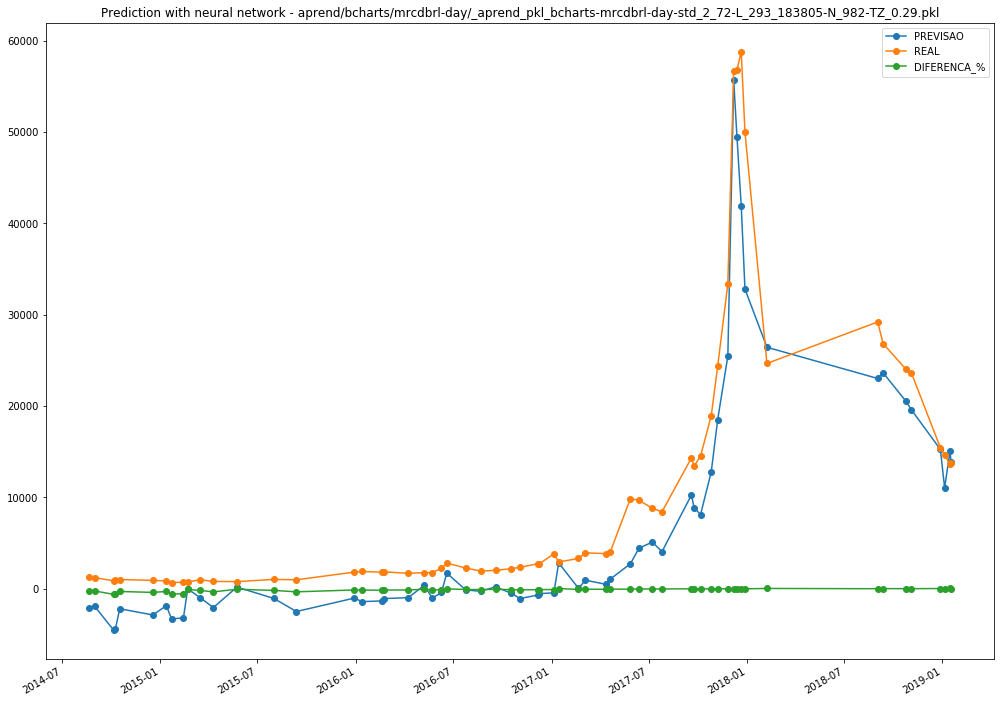

In [29]:
resultados.tail(n=60).plot(figsize=(17,13), marker='o', title='Prediction with neural network - ' + cache_name)

# Comparison worksheet between forecast and actual price

In [30]:
result = pd.DataFrame(columns='DATA PREVISAO REAL DIFERENCA_%'.split())
pd.options.display.max_rows = 200

for i in reversed(range(1, 30)):
    previsao = np.round( nn.predict(previsores_teste[-i].reshape(1, -1))[0], 2 )
    real = np.round( classe_teste[-i], 2 )
    add_row = {
        'DATA': classe_teste.index[-i].strftime('%Y-%m-%d'),
        'PREVISAO': previsao, 
        'REAL': real,
        'DIFERENCA_%': np.round( 100-(previsao*100)/real ,4)}
    result = result.append(pd.Series(add_row), ignore_index=True)        

print(result.sort_values(['DATA']))        
print('\n\nDiferenca media: {}'.format(np.round( result['DIFERENCA_%'].mean() ,2)))
                                                    
        

          DATA  PREVISAO      REAL  DIFERENCA_%
14  2014-08-31  -1942.78   1179.99     264.6438
16  2014-10-06  -4587.13    890.00     615.4079
19  2014-10-09  -4387.69    920.00     576.9228
28  2014-10-17  -2217.47    986.00     324.8955
2   2015-01-22  -3348.69    645.95     618.4132
24  2015-02-13  -3196.83    715.00     547.1091
7   2015-04-10  -2079.47    770.00     370.0610
22  2015-12-29  -1052.96   1831.96     157.4772
5   2016-02-18  -1360.24   1777.00     176.5470
10  2016-02-22  -1104.52   1778.00     162.1215
20  2016-04-08   -998.97   1656.54     160.3046
25  2016-05-08    347.18   1754.58      80.2129
13  2016-05-23  -1062.60   1769.00     160.0678
11  2016-06-09   -431.60   2241.91     119.2514
8   2016-06-19   1688.94   2781.00      39.2686
6   2016-07-24   -140.15   2211.40     106.3376
21  2016-12-08   -562.08   2684.19     120.9404
4   2017-01-05   -472.81   3500.00     113.5089
27  2017-01-14   2811.59   2925.00       3.8773
3   2017-02-20     19.78   3469.98      

==========================================

## Conclusion of this study is that the prediction of this learned neural network is unreliable, given the average prediction difference of 175 percent.

## Recommended to run other machine learning experimenting with other combinations of financial indicators to decrease the average difference between forecast and actual value and then run this analysis again with the new learned neural network 